In [184]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [186]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [187]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [188]:
X = dataset.drop(labels=['CustomerId', 'Surname', 'RowNumber', 'Exited'], axis = 1)
y = dataset['Exited']

In [189]:
from sklearn.preprocessing import LabelEncoder
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [190]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


In [191]:
X = pd.get_dummies(X, drop_first=True, columns=['Tenure'])
X.head()

,CreditScore,Gender,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10
0,619,0,42,0.00,1,1,1,101348.88,False,False,False,True,False,False,False,False,False,False,False,False
1,608,0,41,83807.86,1,0,1,112542.58,False,True,True,False,False,False,False,False,False,False,False,False
2,502,0,42,159660.80,3,1,0,113931.57,False,False,False,False,False,False,False,False,False,True,False,False
3,699,0,39,0.00,2,0,0,93826.63,False,False,True,False,False,False,False,False,False,False,False,False
4,850,0,43,125510.82,1,1,1,79084.10,False,True,False,True,False,False,False,False,False,False,False,False


In [192]:
X = pd.get_dummies(X, drop_first=True, columns=['NumOfProducts'])
X.head()

,CreditScore,Gender,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Tenure_1,...,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,0.00,1,1,101348.88,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,608,0,41,83807.86,0,1,112542.58,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,502,0,42,159660.80,1,0,113931.57,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,699,0,39,0.00,0,0,93826.63,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,850,0,43,125510.82,1,1,79084.10,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [193]:
X = pd.get_dummies(X, drop_first=True, columns=['HasCrCard'])
X.head()

,CreditScore,Gender,Age,Balance,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Tenure_1,Tenure_2,...,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1
0,619,0,42,0.00,1,101348.88,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,608,0,41,83807.86,1,112542.58,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,502,0,42,159660.80,0,113931.57,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,699,0,39,0.00,0,93826.63,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,850,0,43,125510.82,1,79084.10,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [194]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Arguments

monitor: Quantity to be monitored.
min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

patience: Number of epochs with no improvement after which training will be stopped.
verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

start_from_epoch: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped.

In [196]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [197]:
model = Sequential()
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [198]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 250, verbose = 1,validation_split=0.2,callbacks=[callback])


Epoch 1/250
640/640 [==============================] - 1s 897us/step - loss: 0.4179 - accuracy: 0.8228 - val_loss: 0.3774 - val_accuracy: 0.8388
Epoch 2/250
640/640 [==============================] - 0s 769us/step - loss: 0.3678 - accuracy: 0.8470 - val_loss: 0.3730 - val_accuracy: 0.8413
Epoch 3/250
640/640 [==============================] - 0s 757us/step - loss: 0.3571 - accuracy: 0.8522 - val_loss: 0.3621 - val_accuracy: 0.8469
Epoch 4/250
640/640 [==============================] - 0s 763us/step - loss: 0.3476 - accuracy: 0.8572 - val_loss: 0.3555 - val_accuracy: 0.8525
Epoch 5/250
640/640 [==============================] - 0s 745us/step - loss: 0.3411 - accuracy: 0.8620 - val_loss: 0.3512 - val_accuracy: 0.8600
Epoch 6/250
640/640 [==============================] - 0s 737us/step - loss: 0.3350 - accuracy: 0.8616 - val_loss: 0.3475 - val_accuracy: 0.8619
Epoch 7/250
640/640 [==============================] - 0s 748us/step - loss: 0.3282 - accuracy: 0.8670 - val_loss: 0.3488 - val_ac

In [199]:
y_pred = model.predict(X_test)
y_pred = y_pred.astype(np.int32)
y_pred

63/63 [==============================] - 0s 561us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [200]:
model.evaluate(X_test, y_test.to_numpy())

63/63 [==============================] - 0s 664us/step - loss: 0.3660 - accuracy: 0.8560


[0.36600473523139954, 0.8560000061988831]

In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [ 407,    0]], dtype=int64)

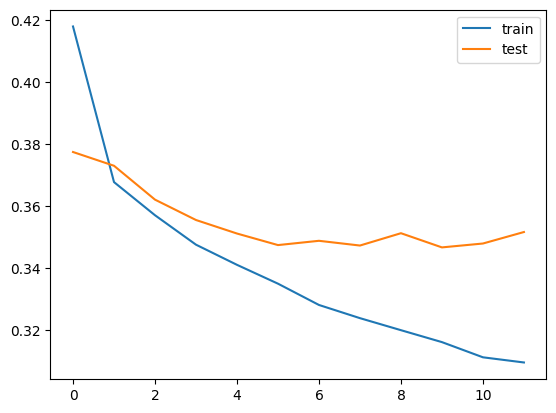

In [202]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.plot(history.history["val_loss"],label="test")
plt.legend()
plt.show()

In [203]:
! pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

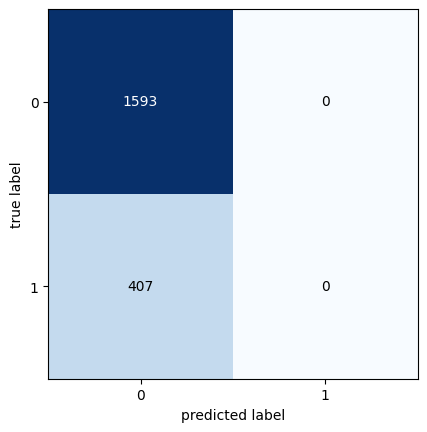

In [204]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat)

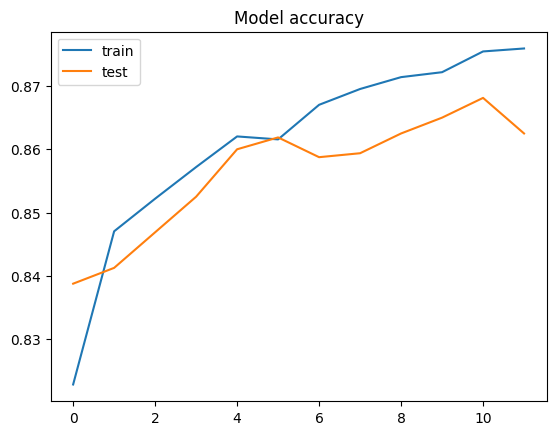

In [205]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.title("Model accuracy")
plt.legend()
plt.show()